#### Draw contour lines on an unstructured triangular grid.

From Michael Duda:
https://www2.mmm.ucar.edu/projects/mpas/tutorial/Howard2024/
mesh_resolution.ncl


Ming Ge Feb 2025

In [3]:
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.tri as tri
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import sys
import math 

In [4]:
def func(x):
    '''
    format numbers for terse labels by removing plus signs and unnecessary zeros
    '''
    s = "%.0g" % x
    if "e" in s:
        tup = s.split('e')
        significand = tup[0].rstrip('0').rstrip('.')
        sign = tup[1][0].replace('+', '')
        exponent = tup[1][1:].lstrip('0')
        s = ('%se%s%s' % (significand, sign, exponent)).rstrip('e')    
    return s

In [5]:
dir_data = "/glade/derecho/scratch/duda/mpas_tutorial/240-48km_variable/"
flnm_grid = dir_data + "SouthAmerica.init.nc"
ds_i = xr.open_dataset(flnm_grid)

# Convert to degrees from radians¶
lonData = np.degrees(ds_i.lonCell)
latData = np.degrees(ds_i.latCell)

# convert lonData to range [-180, 180]
lonData = ((lonData + 180) % 360) - 180

triang = tri.Triangulation(lonData, latData)
uxda_area = ds_i.areaCell.data
uxda_den  = ds_i.meshDensity.data

minSpacingKm = math.sqrt(min(uxda_area)*2.0/math.sqrt(3.0))*0.001 # 6371.229
fld = minSpacingKm /np.power(uxda_den,0.25)

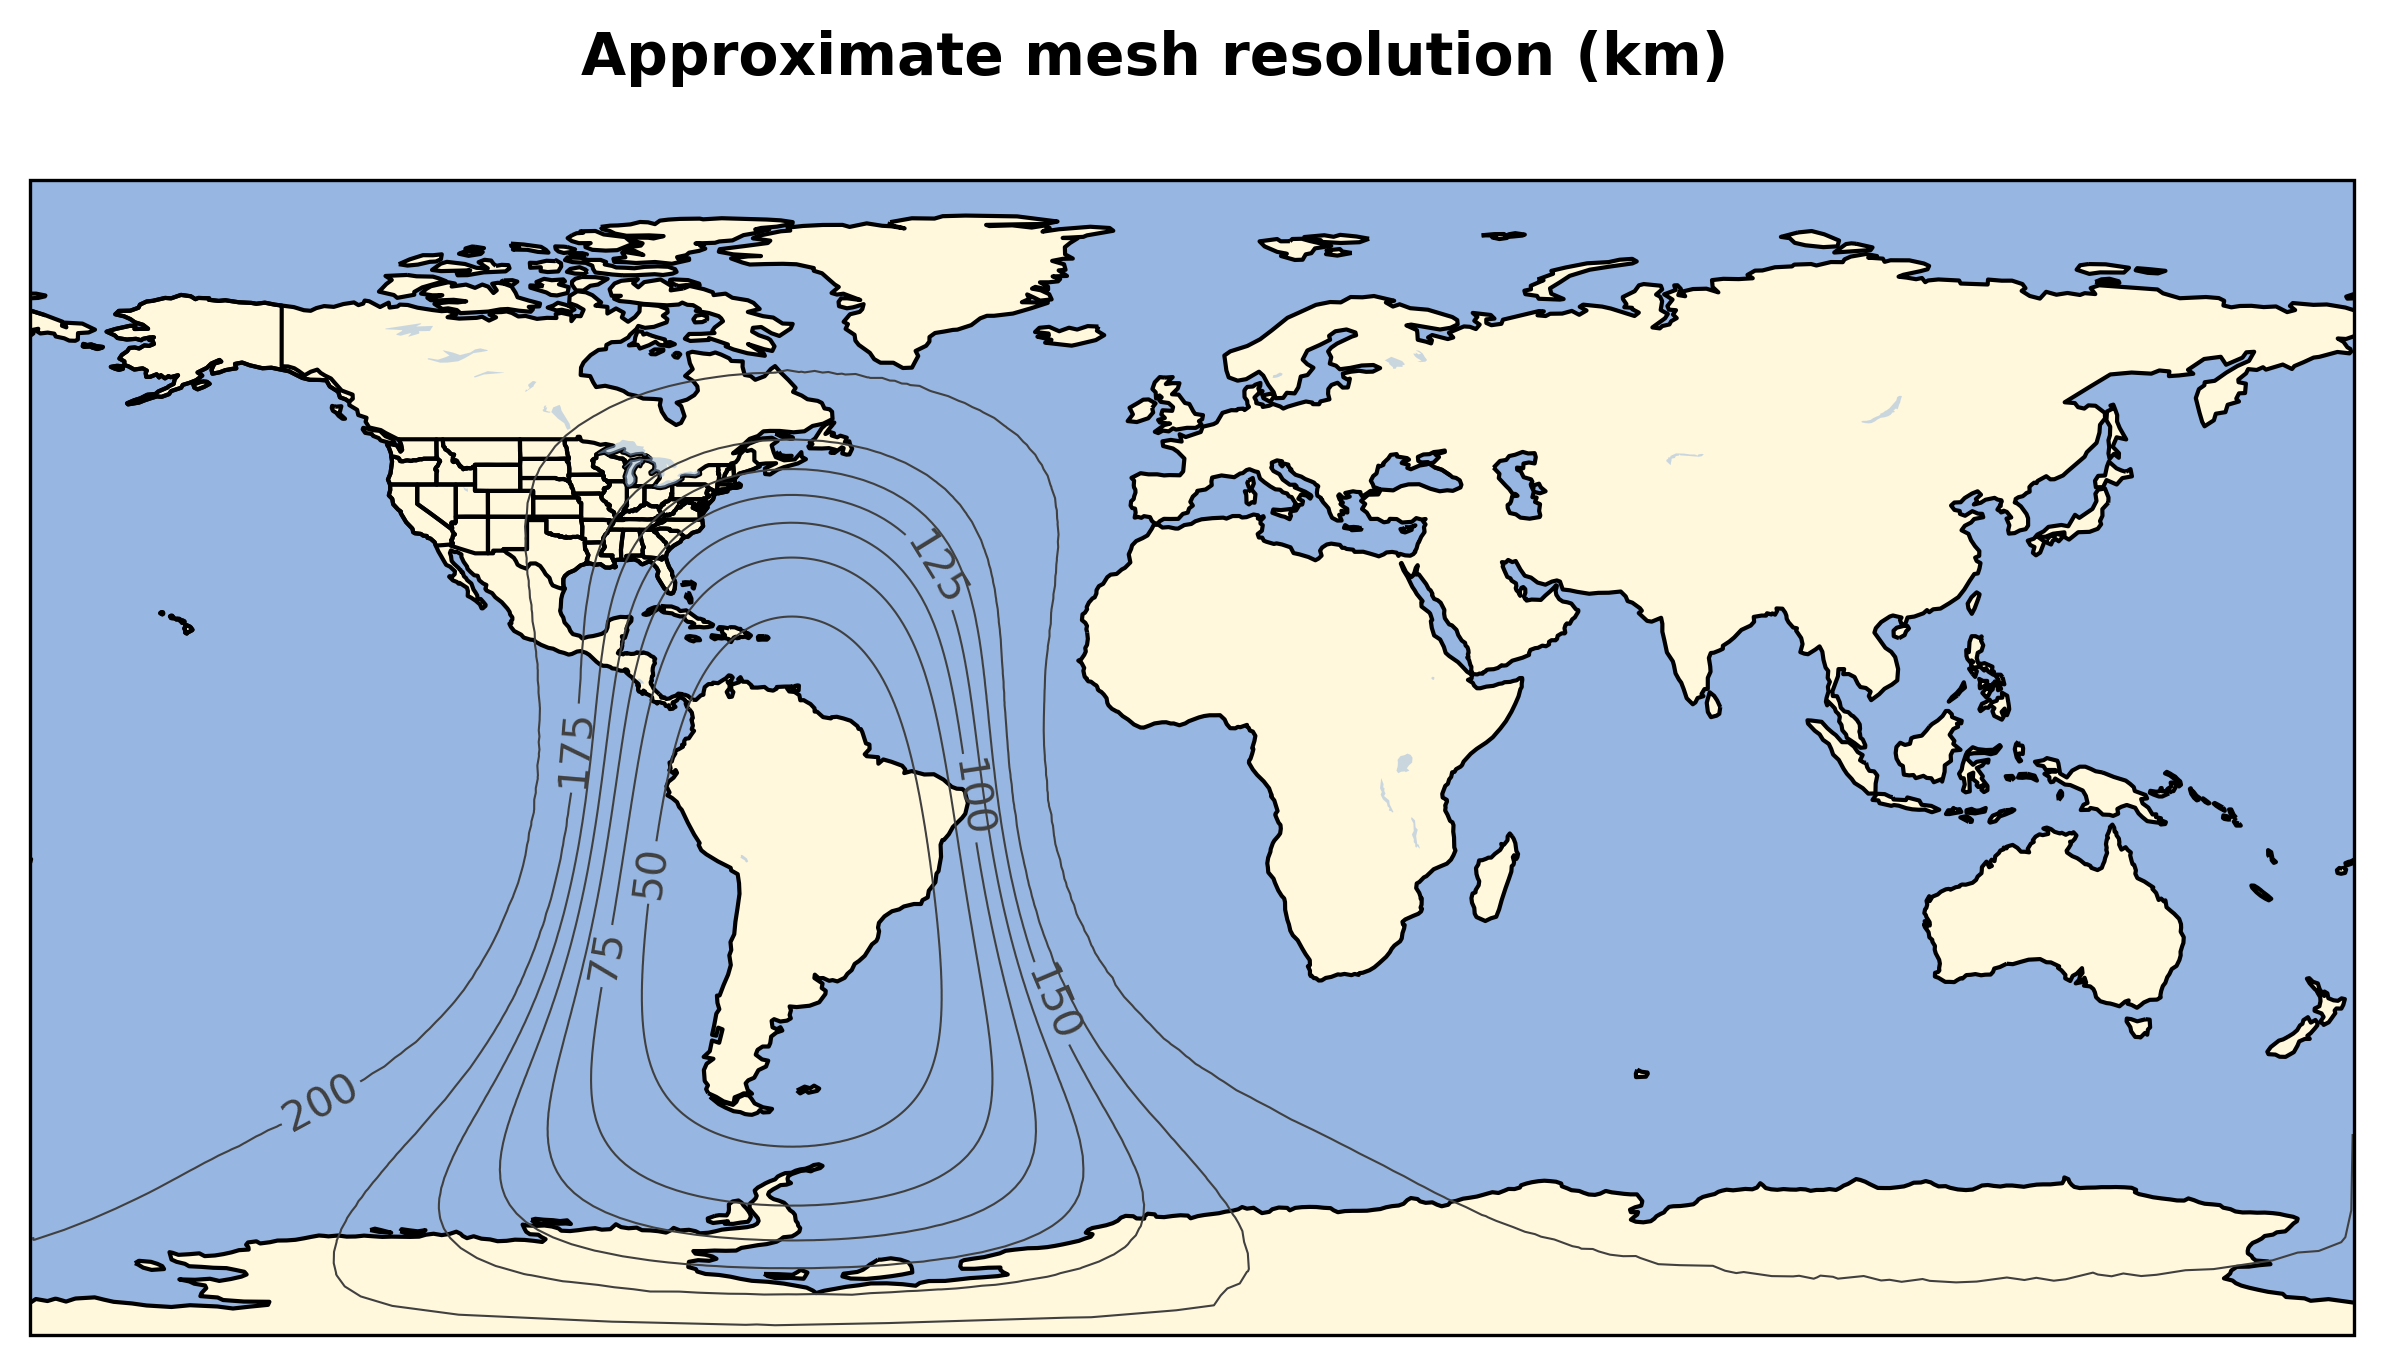

In [6]:
# by setting the central meridian to 180°, there is a gap in polar region
#fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, dpi=300)
fig, ax = plt.subplots(figsize=(10, 5), subplot_kw={'projection': ccrs.PlateCarree()}, dpi=300)

# ax.set_global or plot_ax.set_extent
#ax.set_extent([np.min(lon), np.max(lon), np.min(lat), np.max(lat)], crs=ccrs.PlateCarree())
#ax.set_extent([-40, 40, -30, 30], crs=ccrs.PlateCarree())
ax.set_global

# Choose resolution of map features.
# Note that these features are downloaded when plotting for the first time, and for the entire globe,
#  so requesting high resolution can take several minutes.
scale = '110m' # '50m' # '10m'

ax.add_feature(cfeature.OCEAN.with_scale(scale))
ax.add_feature(cfeature.STATES.with_scale(scale))
ax.add_feature(cfeature.LAKES.with_scale(scale), alpha=0.5)
ax.add_feature(cfeature.COASTLINE.with_scale(scale))

mm = ax.tricontour(triang, fld,  
                  transform=ccrs.PlateCarree(),
                   colors=['0.25', '0.25', '0.25', '0.25', '0.25'],
                   linewidths=[0.5, 0.5, 0.5, 0.5, 0.5] )

ax.clabel(mm, mm.levels ) #, fmt=func)  

# mask land
ax.add_feature(cfeature.LAND, facecolor='cornsilk', zorder=1) 

plt.suptitle('Approximate mesh resolution (km)', fontweight="bold", fontsize=14);


#### For Comparison: plot from original NCL

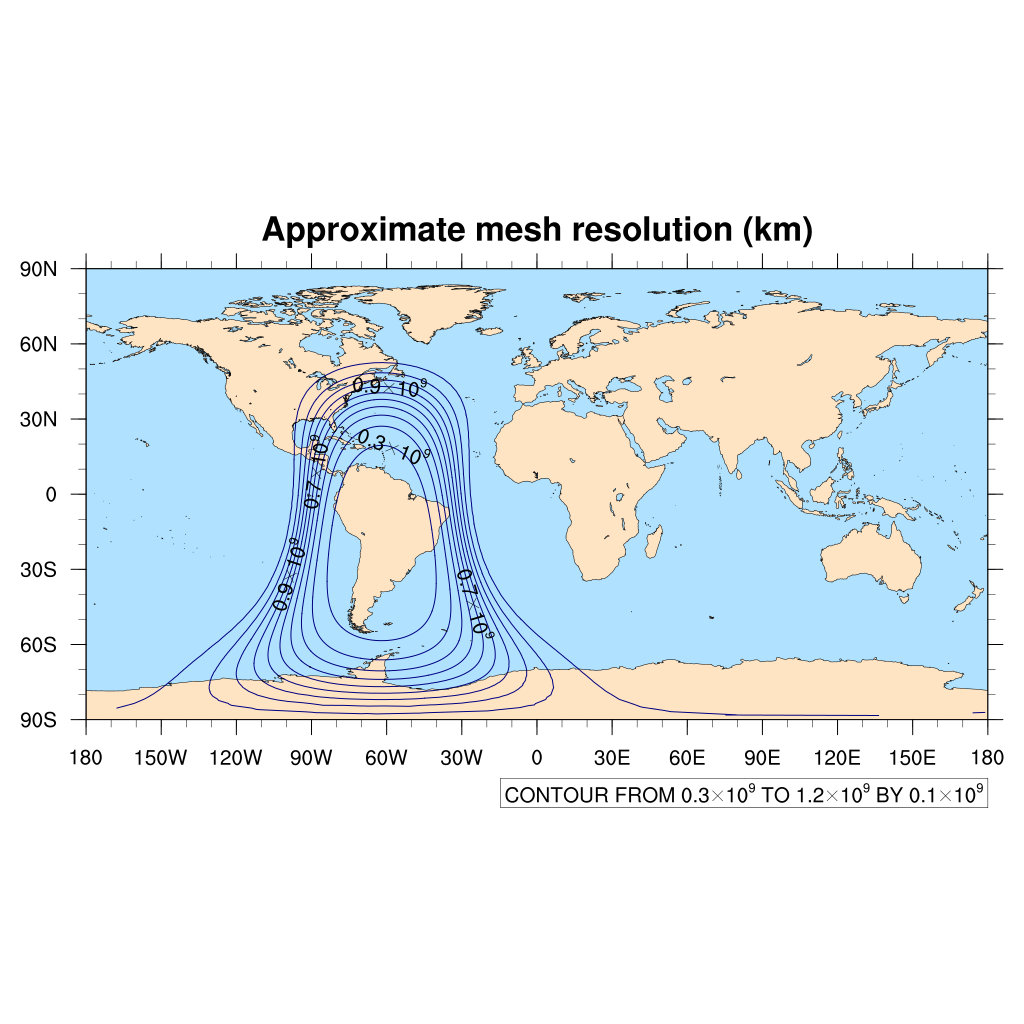

In [7]:
from IPython.display import Image
Image(filename=('/glade/u/home/mingge/NCL_2_PYTHON/mesh_resolution.png'))